### This is a  dataset which consists information about the location of the house ,price and other aspects such as square feet etc. When we work on these sort of data , we need to see which column is important for us and which is not. Our main aim today is to make a model which can give us a good prediction on the price of the house based on other variables. We are going to use Linear Regression for this dataset and see if it gives us a good accuracy or not. 
### Here I have used another regression algorithm XGboost.Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.There are several metrics involved in regression like root-mean-squared error (RMSE) and mean-squared-error (MAE). These are some key members of XGBoost models, each plays an important role.







In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv(r"C:\Users\SUBARNORAJ ROY\Downloads\dataset.csv.csv")

In [4]:
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.drop(['id'],axis=1,inplace=True)

What can we infer from the above describe function ?

Look at the bedroom columns , the dataset has a house where the house has 33 bedrooms , seems to be a massive house and would be interesting to know more about it as we progress.
Maximum square feet is 13,450 where as the minimum is 290. we can see that the data is distributed.
Similarly , we can infer so many things by just looking at the describe function.

In [6]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

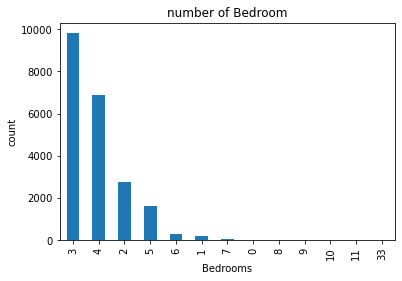

In [8]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('count')
sns.despine

As we can see from the visualization 3 bedroom houses are most commonly sold followed by 4 bedroom. For a builder having this data , he can make a new building with more 3 and 4 bedroom’s to attract more buyers.

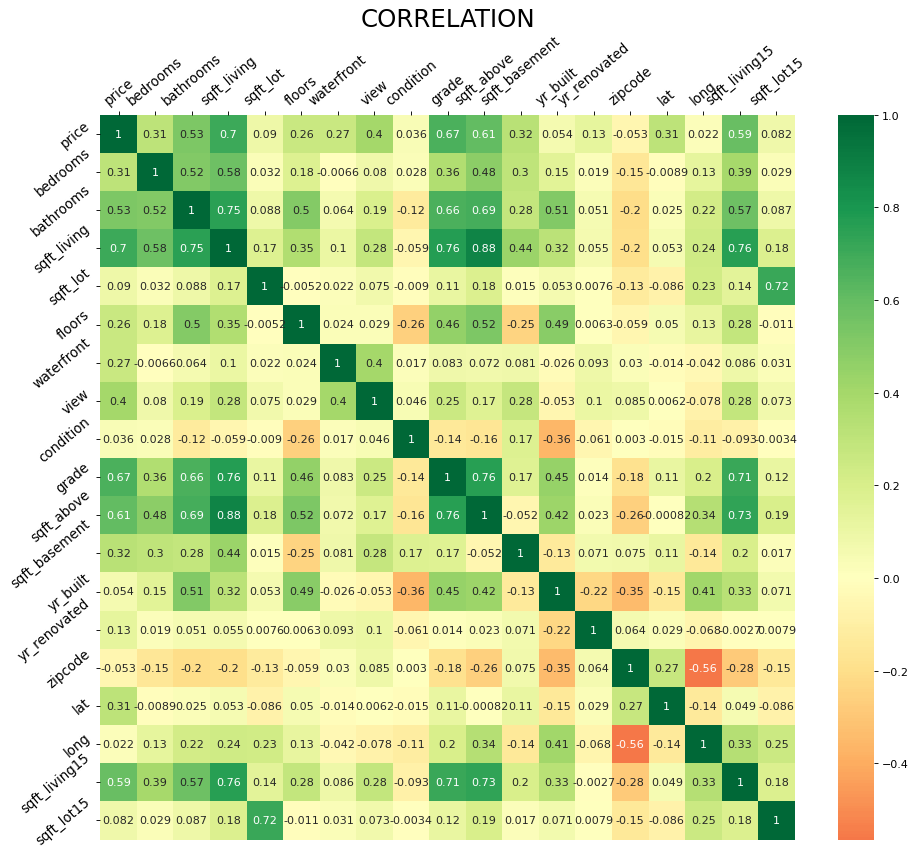

In [9]:
plt.figure(figsize=(14,12), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('CORRELATION', fontsize=22)


#plt.xticks(rotation=90)

plt.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = True, labeltop=True,rotation=40)


From this corelation plot we can figure out which metrics are important for us ,that is , we can identify the metrices that has a close relation with the prices.

<Figure size 720x720 with 0 Axes>

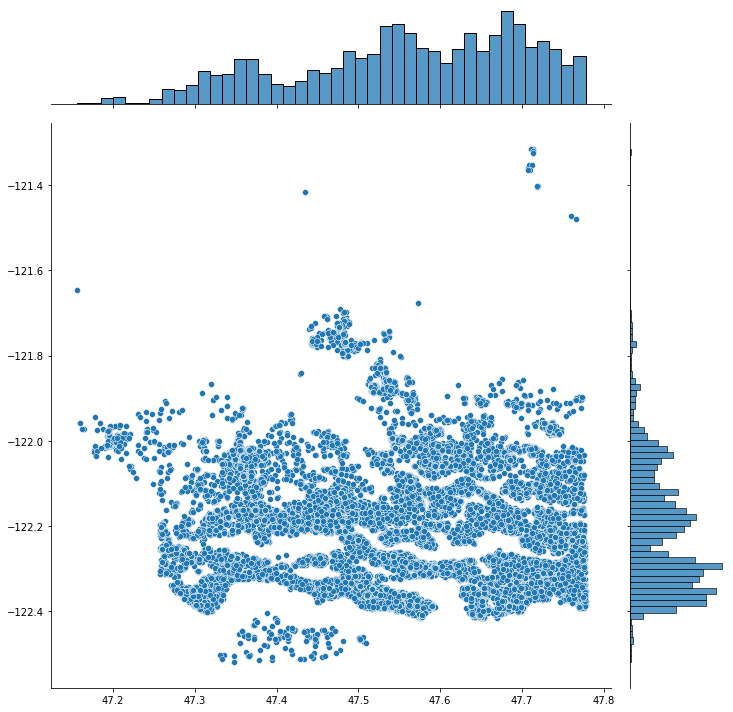

In [10]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, height=10)
plt.ylabel("Longitude", fontsize=12)
plt.xlabel("Latitude",fontsize=12)
plt.show()
#sns.despine

We use seaborn to get his beautiful visualization. Joinplot function helps us see the concentration of data and placement of data and can be really useful. Let us see what we can infer from this visualization. For latitude between -47.7 and -48.8 there are many houses , which makes it an ideal location. But when we talk about longitude we can see that concentration is high between -122.2 to -122.4. Which would mean that most of the buy’s has been for this particular location.

Text(0.5, 1.0, 'Price vs Square Feet')

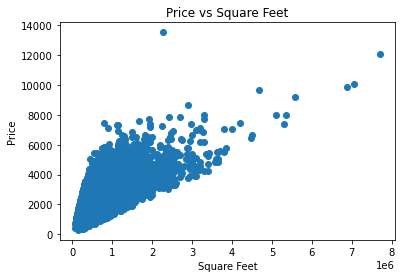

In [97]:
plt.scatter (data.price, data.sqft_living) 
plt.ylabel("Price")
plt.xlabel("Square Feet")
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Location of the area')

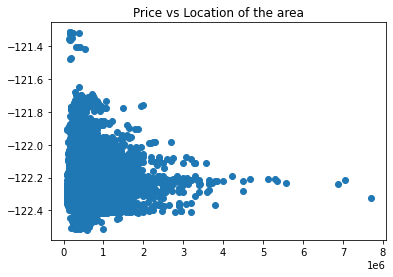

In [98]:
plt.scatter (data.price, data.long)
plt.title("Price vs Location of the area")

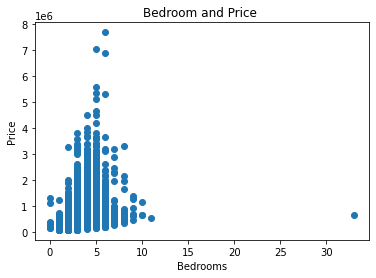

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [32]:
plt.scatter (data.bedrooms, data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms") 
plt.ylabel("Price")
plt.show()
sns.despine

Text(0, 0.5, 'Price')

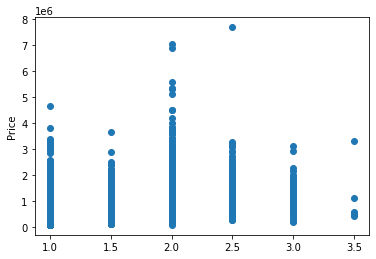

In [99]:
plt.scatter (data.floors, data.price)
plt.ylabel("Price")

Text(0, 0.5, 'Price')

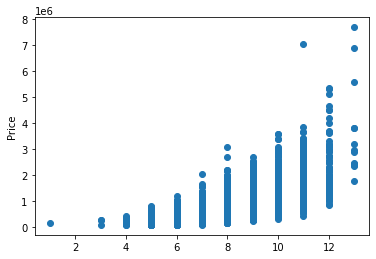

In [100]:
plt.scatter (data.grade, data.price)
plt.ylabel("Price")

In [101]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'condition', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
X = data[features]
y = data.price
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred=np.trunc(y_pred)

In [102]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
from sklearn import metrics 
 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
df.head()

Mean Absolute Error: 125002.02899444787
Mean Squared Error: 43690641407.16502
Root Mean Squared Error: 209023.0642947448


,Actual,Predicted
17384,297000.0,387201.0
722,1578000.0,1502714.0
2680,562100.0,527453.0
18754,631500.0,577935.0
14554,780000.0,999339.0


<font color='orange'> **Here is the result of the Linear Regression prediction** </font>

_______________________________________________________________________________________________________________________



**Implementing xgboost algorithm**

In [103]:

pip install xgboost


Note: you may need to restart the kernel to use updated packages.


[12:26:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Root Mean Squared Error (Xgboost):  123218.42233881552


Text(0.5, 1.0, 'xgboost')

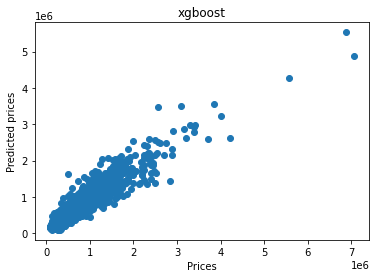

In [104]:
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, learning_rate=0.01, max_depth=4, min_child_weight=1.5, n_estimators=7200,                                                                 reg_alpha=0.9, reg_lambda=0.6, subsample=0.2, seed=42, silent=1)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("Root Mean Squared Error (Xgboost): ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("xgboost")

In [105]:
y_pred=np.trunc(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(-5)

,Actual,Predicted
17384,297000.0,292005.0
722,1578000.0,1885421.0
2680,562100.0,529022.0
18754,631500.0,594265.0
14554,780000.0,721391.0
...,...,...
15231,467500.0,433478.0
8210,203000.0,228969.0
12860,446000.0,433907.0
12947,206000.0,187859.0


<font color='maroon'> **Here is the result of the Xgboost prediction** </font>